# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [101]:
# Initial imports
import os
import pandas as pd
from dotenv import find_dotenv, get_key
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\larisa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Read your api key environment variable
api_key = get_key(find_dotenv(),'NEWS_API_KEY')

In [12]:
api_key

'63e314fae9fb44cea189fab6ce246e37'

In [13]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [14]:
newsapi

In [24]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="Bitcoin",language="en")

In [16]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")

In [28]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
bitcoin_info_df = pd.DataFrame(bitcoin_sentiments)

# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_info_df = bitcoin_info_df[cols]
bitcoin_info_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.2960,0.0,0.942,0.058,Shares of Square are up more than 6% today aft...
1,0.0000,0.0,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...
2,0.7506,0.0,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
3,0.0000,0.0,1.000,0.000,Cryptocurrency prices continued to tumble Frid...
4,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...


In [29]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
ethereum_info_df = pd.DataFrame(ethereum_sentiments)

# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_info_df = ethereum_info_df[cols]
ethereum_info_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.4019,0.15,0.778,0.072,Their investors call them disruptive innovator...
1,0.7506,0.00,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
2,0.0258,0.00,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...
3,0.0000,0.00,1.000,0.000,New York (CNN Business)Bitcoin prices continue...
4,0.4754,0.00,0.909,0.091,"The creators behind CryptoPunks, one of the mo..."


In [32]:
# Describe the Bitcoin Sentiment
bitcoin_info_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.221960,0.010300,0.927900,0.061850
std,0.308283,0.025375,0.076463,0.068863
min,-0.381800,0.000000,0.777000,0.000000
25%,0.000000,0.000000,0.857000,0.000000
50%,0.160900,0.000000,0.939000,0.046000
75%,0.360375,0.000000,1.000000,0.119250
max,0.750600,0.080000,1.000000,0.179000


In [33]:
# Describe the Ethereum Sentiment
ethereum_info_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.123015,0.011200,0.945150,0.043650
std,0.304172,0.036611,0.071036,0.059984
min,-0.401900,0.000000,0.778000,0.000000
25%,0.000000,0.000000,0.924000,0.000000
50%,0.000000,0.000000,0.964000,0.017000
75%,0.289900,0.000000,1.000000,0.066000
max,0.817600,0.150000,1.000000,0.210000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: ethereum- has the highest max

Q. Which coin had the highest positive score?

A: ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [102]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [44]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words("english")

# Expand the default stopwords list if necessary
sw.append("seen")
sw.append("chart")
sw.append("file")
sw.append("coworker")
sw.append("picture")
sw.append("also")
sw.append("taken")
sw.append("illustration")
sw.append("representation")

In [65]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)
    words = word_tokenize(re_clean)
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word.lower() for word in words]    
    
    # Remove the stop words
    words = [word for word in words if word not in sw]    
    
    return (tokens)

In [69]:
# Create a new tokens column for Bitcoin

bitcoin_info_df["tokens"] = bitcoin_info_df.text.apply(tokenizer)

bitcoin_info_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.2960,0.0,0.942,0.058,Shares of Square are up more than 6% today aft...,"[Shares, of, Square, are, up, more, than, 6, %..."
1,0.0000,0.0,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...,"[Tesla, ’, s, relationship, with, bitcoin, is,..."
2,0.7506,0.0,0.829,0.171,Cryptocurrency continues to gain mainstream ac...,"[Cryptocurrency, continues, to, gain, mainstre..."
3,0.0000,0.0,1.000,0.000,Cryptocurrency prices continued to tumble Frid...,"[Cryptocurrency, price, continued, to, tumble,..."
4,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...,"[The, crypto, industry, a, a, whole, ha, seen,..."


In [70]:
# Create a new tokens column for Ethereum
ethereum_info_df["tokens"] = ethereum_info_df.text.apply(tokenizer)

ethereum_info_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.4019,0.15,0.778,0.072,Their investors call them disruptive innovator...,"[Their, investor, call, them, disruptive, inno..."
1,0.7506,0.00,0.829,0.171,Cryptocurrency continues to gain mainstream ac...,"[Cryptocurrency, continues, to, gain, mainstre..."
2,0.0258,0.00,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...,"[Venmo, is, jumping, aboard, the, cryptocurren..."
3,0.0000,0.00,1.000,0.000,New York (CNN Business)Bitcoin prices continue...,"[New, York, (, CNN, Business, ), Bitcoin, pric..."
4,0.4754,0.00,0.909,0.091,"The creators behind CryptoPunks, one of the mo...","[The, creator, behind, CryptoPunks, ,, one, of..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [103]:
from collections import Counter
from nltk import ngrams

In [104]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = bitcoin_info_df["text"].str.cat()
cleaned_information =  tokenizer(bitcoin_text)
bigram_counts = Counter(ngrams(cleaned_information, n=2))
bigram_counts.most_common(20)

[(('char', ']'), 20),
 ((']', 'By'), 6),
 (('By', 'Reuters'), 6),
 (('Reuters', 'Staff'), 6),
 ((',', 'the'), 5),
 ((',', 'a'), 5),
 (('(', 'Reuters'), 5),
 (('Reuters', ')'), 5),
 (('.', 'The'), 4),
 ((')', '-'), 4),
 (('more', 'than'), 3),
 (('of', '$'), 3),
 (('to', 'the'), 3),
 ((',', 'and'), 3),
 (('that', 'the'), 3),
 ((',', 'said'), 3),
 (('said', 'on'), 3),
 (('of', 'the'), 3),
 (('Shares', 'of'), 2),
 (('6', '%'), 2)]

In [75]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ethereum_info_df["text"].str.cat()
clean_ethereum_text =  tokenizer(ethereum_text)
bigram_counts = Counter(ngrams(clean_ethereum_text, n=2))
bigram_counts.most_common(20)

[(('char', ']'), 20),
 (('of', 'a'), 6),
 ((',', 'and'), 5),
 ((',', 'a'), 4),
 ((']', 'By'), 4),
 (('By', 'Reuters'), 4),
 (('Reuters', 'Staff'), 4),
 (('A', 'representation'), 4),
 (('representation', 'of'), 4),
 (('of', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'Ethereum'), 4),
 (('Ethereum', 'are'), 4),
 (('are', 'seen'), 4),
 (('seen', 'in'), 4),
 (('in', 'front'), 4),
 (('front', 'of'), 4),
 (('a', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'in'), 4)]

In [76]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [78]:
# Use token_count to get the top 10 words for Bitcoin
token_count(cleaned_information, N=10)

[(',', 36),
 ('a', 27),
 ('of', 21),
 ('[', 20),
 ('char', 20),
 (']', 20),
 ('.', 18),
 ('the', 17),
 ('in', 13),
 ('and', 12)]

In [79]:
# Use token_count to get the top 10 words for Ethereum
token_count(clean_ethereum_text, N=10)

[(',', 36),
 ('a', 27),
 ('of', 21),
 ('[', 20),
 ('char', 20),
 (']', 20),
 ('.', 18),
 ('the', 17),
 ('in', 13),
 ('and', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

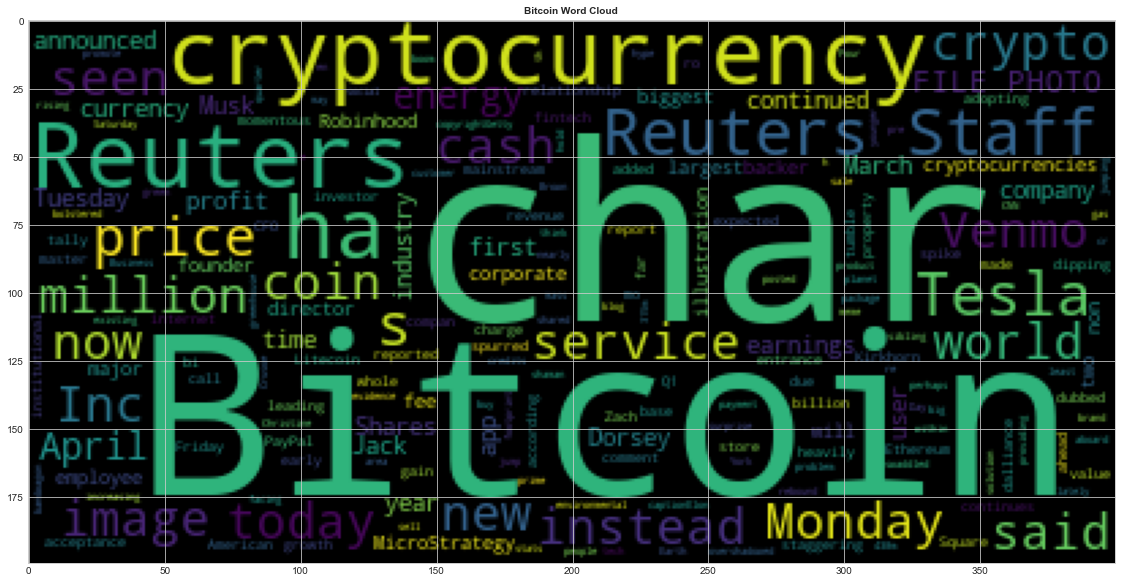

In [83]:
# Generate the Bitcoin word cloud
BIT_string = ' '.join(cleaned_information)
wc = WordCloud().generate(BIT_string)
plt.title("Bitcoin Word Cloud", fontsize=10, loc="center", fontweight="bold")
plt.imshow(wc)

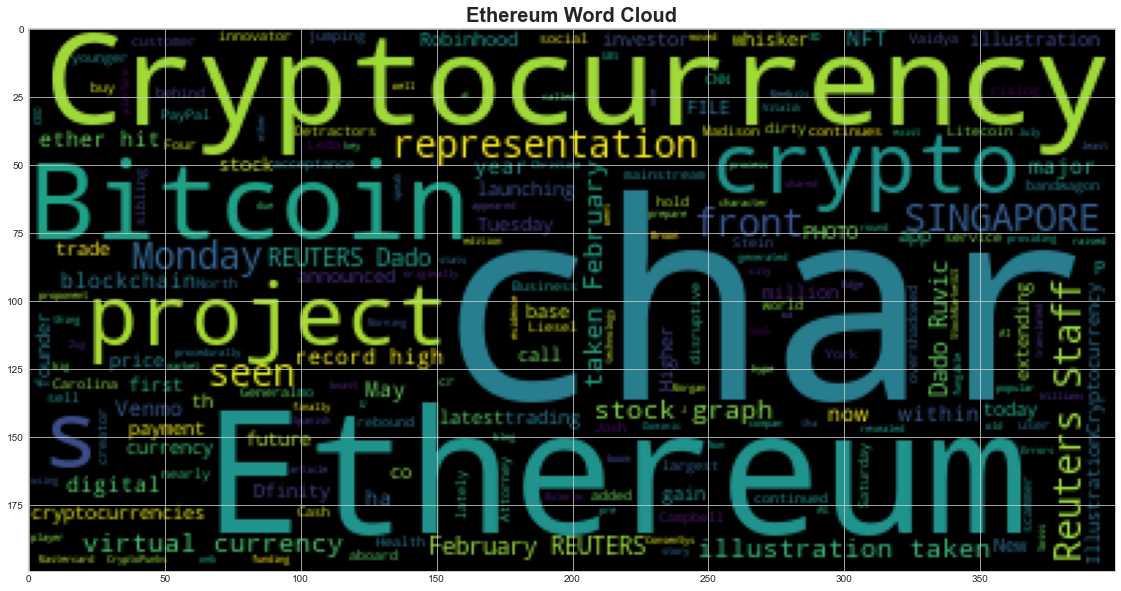

In [87]:
# Generate the Ethereum word cloud
ETH_string = ' '.join(clean_ethereum_text)
wc = WordCloud().generate(ETH_string)
plt.title("Ethereum Word Cloud", fontsize=20, loc="center", fontweight="bold")
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [105]:
import spacy
from spacy import displacy

In [106]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [107]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [98]:
# Concatenate all of the Bitcoin text together
all_bitcoin_info = bitcoin_info_df.text.str.cat()
all_bitcoin_info

'Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet currency dipping below $50,000 for the first time since early March.\r\nBitcoin is down ro… [+1222 chars]The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bi

In [115]:
# Run the NER processor on all of the text
Bitcoin_doc = nlp(all_bitcoin_info)

# Add a title to the document
Bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [120]:
# Render the visualization
displacy.render(Bitcoin_doc, style='ent')

In [117]:
# List all Entities
for ent in Bitcoin_doc.ents:
    print(ent.text, ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
a momentous year DATE
2020 DATE
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
Jack Dorsey PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi GPE
Reuters ORG
Santa Clarita GPE
California G

---

### Ethereum NER

In [118]:
# Concatenate all of the Ethereum text together
all_ethereum_info = ethereum_info_df.text.str.cat()
all_ethereum_info

'Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars]New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest cryptocurrency has been overshadowed lately by its younger sibling, … [+866 chars]The creators behind CryptoPunks, one of the most popular NFT projects on the web, just revealed their latest project called Meebits. 

In [119]:
# Run the NER processor on all of the text
ETH_doc = nlp(all_bitcoin_info)

# Add a title to the document
ETH_doc.user_data["title"] = "Ethereum NER"

In [122]:
# Render the visualization
displacy.render(ETH_doc, style='ent')

In [123]:
# List all Entities
for ent in ETH_doc.ents:
    print(ent.text, ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
a momentous year DATE
2020 DATE
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
Jack Dorsey PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi GPE
Reuters ORG
Santa Clarita GPE
California G

---